# Cirq basic


we will look at the basics of how to use Cirq. I will talk about how to use qubits, different devices, gates, operations, unitary matrices, adding noise and run a couple of circuits


installing Cirq

In [1]:
!pip install --quiet cirq

import cirq

import cirq_google

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.8/223.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

## Qubits

Cirq has 3 ways to initialise qubits

  .NamedQubits: here we can give names to the qubits. \
  .LineQubits: Here we can create qubits using arrays. \
  .GridQubits: Here qubits are a part of a grid which we can manipulate ([source](https://quantumai.google/reference/python/cirq/GridQubit)).


Here are some examples of defining each type of qubit.

In [3]:
# named qubits (primarily used when we want to give names to qubits for algorithms)
q0 = cirq.NamedQubit('alice')
q1 = cirq.NamedQubit('bob')


# we can create individual qubits that are part of a lined arch.
q2 = cirq.LineQubit(2)

# we can even use the python Range function to create multiple at once
q0, q1, q2 = cirq.LineQubit.range(3)

# We can create qubits that are a part of a grid (more useful when working on actual hardware).
q4_5 = cirq.GridQubit(4, 5)

# Or using shapes like square, rectangle. (you can also use custom shapes)
qubits = cirq.GridQubit.rect(rows = 2, cols = 4 )
print(qubits)

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(1, 3)]


There are also pre-packaged sets of qubits called [Devices](https://quantumai.google/cirq/hardware/devices).  These follow the architecture of famous hardware that can be imported. Cirq also lets us make api calls to popular hardware such as AQT, Azure etc (check devices documantation) and use their mappings.

In [ ]:
#this is the diamond-shaped grid with 54 qubits that mimics the sycamore device from google.

print(cirq_google.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

## Gates and operations

Now we can use the qubits to create operations that can be used to create circuits [Documentation](https://quantumai.google/cirq/build/gates).

There are single gate operations such as Hadamard, Pauli X Y and Z gates and a lot more which are applied to single gates. \


There's also Multi gate operations such as CNOT, SWAP, CZ. \


There's a Measurement operation as well which measures the qubit. \


examples:

In [9]:
Hadamard = cirq.H
PauliZ = cirq.Z
SWAPGate = cirq.SWAP

#we can even create roots of gates such as X  to get sqrt(X) these can be used for more granular rotations compared to PauliX
SqrtPauliX = cirq.X**0.5

# Example operations
q0,q1 = cirq.LineQubit.range(2)
print("q0, q1:",q0,q1)
z_op = cirq.Z(q0)
print(z_op)
not_op = cirq.CNOT(q0, q1)
print(not_op)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)

# You can also use the gates you specified earlier.
swap = SWAPGate(q0, q1)
pauliZ = PauliZ(q0)
print(swap)

q0, q1: q(0) q(1)
Z(q(0))
CNOT(q(0), q(1))
SWAP(q(0), q(1))


cirq also lets us create custom gates. You can find more [here](https://quantumai.google/cirq/build/custom_gates)

## Circuits and moments

To see how these gates work in a circuit we will now build circuits. Cirq also has this concept of moments. These can be thought of as time slices that seperate when each gate is executed in a circuit (better explained via example)(Think of these as times t1, t2 etc where we are interested in whats happening in the circuit or want to control which gates occur first.). \

Cirq explains a Quantum "Circuit" as a collection of the aforementioned "Moments" and moments themselves as a collections of gate operations on the qubits. \

 A `Moment` is a collection of `Operation`s that all act during the same time slice. A `Moment` can be thought of as a vertical slice of a quantum circuit diagram. \

Cirq is optimised and by default will attempt to slide your operation into the earliest possible `Moment` when you insert it so if you want something different then we must pay attention to where we are placing moments.

Circuits doccumentation in detail [here](https://quantumai.google/reference/python/cirq/Circuit)

In [10]:
#creating a simple circuit with 3 qubits and applyinh a Hadamard to each of them
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [11]:
#using python list comprehention to make it easier
circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)

0: ───H───

1: ───H───

2: ───H───


In [14]:
circuit = cirq.Circuit()
circuit.append([cirq.SWAP(q0, q1), cirq.H(q2)])
print(circuit)

0: ───×───
      │
1: ───×───

2: ───H───


All the Hadamards are made to occure at the same time in the circuits 1 and 2 above. in circuit 3 Hadamard Op on q2 is pushed ot the left. Cirq pushes non overlapping operations to the left by default. For overlaping gates they are put one after the other like in circuit 3.

In [24]:
circuit3 = cirq.Circuit()
circuit3.append([cirq.SWAP(q0, q1), cirq.H(q1),  cirq.H(q2),cirq.CNOT(q1,q2)])
print(circuit3)

0: ───×───────────
      │
1: ───×───H───@───
              │
2: ───H───────X───


What if we want the hadamards in circuit 3 to occur together (no reason). This is where the "Moments"" are usefull.

you can create the circuit moment-by-moment or use a different `InsertStrategy`, explained clearly [Here](https://quantumai.google/cirq/build/circuits).

basically we add time slices to our circuits and organise our circuit using them.



In [ ]:
# Creates each gate in a separate moment by passing an iterable of Moments instead of Operations.
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))

0: ───H───────────

1: ───────H───────

2: ───────────H───


In [32]:
# for circuit 3 (Moving both hadamard together)
from cirq.circuits import InsertStrategy

circuit32 = cirq.Circuit()
moment = cirq.Moment(cirq.H(q1),  cirq.H(q2))
circuit32.append([cirq.SWAP(q0, q1), moment,cirq.CNOT(q1,q2)])
print(circuit32)

0: ───×───────────
      │
1: ───×───H───@───
              │
2: ───────H───X───


## Unitary matrices

Many quantum operations have unitary matrix representations.  This matrix can be accessed by applying `cirq.unitary(operation)` to that `operation`.  This can be applied to gates, operations, and circuits that support this protocol and will return the unitary matrix that represents the object.

In [38]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))

Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [39]:
#You can also convert Unitary to custom gates as shown in the link above:
import numpy as np
"""Define a custom single-qubit gate."""
class MyGate(cirq.Gate):
    def __init__(self):
        super(MyGate, self)

    def _num_qubits_(self):
        return 1

    def _unitary_(self):
        return np.array([
            [1.0,  1.0],
            [-1.0, 1.0]
        ]) / np.sqrt(2)

    def _circuit_diagram_info_(self, args):
        return "G"

my_gate = MyGate()
print(cirq.unitary(my_gate))

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


##Noise

Cirq allows us to add noise to circuits at multiple levels.

we can add noise to the entire circuit, while taking measurements (documentation of both these might be incomplete wasnt able to make it run) and add noise to intividual bits and connections.

We can see cirq implementation of a couple of types noise below.

[Full Documentation on Noise](https://quantumai.google/cirq/noise/representing_noise)

### Bit flip

`cirq.BitFlipChannel` (or `cirq.bit_flip`) is equivalent to applying `cirq.X` with a given probability. This channel is best used to represent state-agnostic bit flip errors in the body of a circuit.

In [41]:
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.bit_flip(p=0.5).on(q0),
    cirq.measure(q0, key='result')
)
result = cirq.Simulator(seed=0).run(circuit, repetitions=1000)
print(result.histogram(key='result'))

Counter({1: 504, 0: 496})


### Amplitude damping

`cirq.AmplitudeDampingChannel` (or `cirq.amplitude_damp`) performs a $|1\rangle \rightarrow |0\rangle$ transformation with some probability `gamma`, leaving the existing $|0\rangle$ state alone. This channel is best used to represent an idealized form of energy dissipation, where qubits decay from $|1\rangle$ to $|0\rangle$.

In [43]:
q0 = cirq.LineQubit(0)
circuit = cirq.Circuit(
    cirq.X(q0),
    cirq.amplitude_damp(gamma=0.2).on(q0),
    cirq.measure(q0, key='result')
)
result = cirq.Simulator(seed=0).run(circuit, repetitions=1000)
print(result.histogram(key='result'))

Counter({1: 795, 0: 205})


## Simulation

Once we have built our circuits with the necesary noise we can get the simulated results of running our circuit using cirq's "Simulator()" (20 qubit limit)

[Documentation](https://quantumai.google/cirq/simulate/simulation)

There are two different approaches to using a simulator:

`simulate()`:  Offers a detailed, comprehensive look at the quantum state (wavefunction) after circuit execution. It is for when you need to look "under the hood" of your quantum circuit. It's output typically includes probabilities, phase information, and can even show how entanglements and superpositions are created within the circuit.
`run()`: Outputs measurement results as bit strings, simulating the practical outcome of running a quantum circuit on a physical device.



In [48]:
#simple hadamard
simple_hadamard = cirq.Circuit()
q0 = cirq.LineQubit(0)
simple_hadamard.append(cirq.H(q0))
s = cirq.Simulator()
results = s.simulate(simple_hadamard)
print(results)


measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: 0.707|0⟩ + 0.707|1⟩

phase:
output vector: |⟩


In [49]:
#adding one more hadamard (retirn to |0>)
simple_hadamard.append(cirq.H(q0))
results = s.simulate(simple_hadamard)
print(results)

measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: |0⟩

phase:
output vector: |⟩


We can take a look at the example simulation a 2-qubit "Bell State" shown in the documentation:

In [44]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
sample = s.run(bell_circuit, repetitions=1000)


Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


In [45]:
print(sample)

result=110110011100100111111010100011000011110111101111100100100010111111001111001101110000010100000001010010111011100100011110000000010011100100101000010111110110100101000000011110000111010001001110111111000110010111011011010001111111111100010100111001001001000000111000001100101101011011010011101110101001010011001110101011011110101011111000101000111000110010010000011001000010111001000011010001000110001111001000011010101100100001010000010011001111010010010000101011010111100111100101111111110010010110111010111110101110111100000110010110100000101000011110000101010100100111010101100100001111011011101010100001101000011101010010110001001010000001001010011101100000011100111011100001010111110100111000001000100010101001011111101011101010111001011100111010101101101011010100011001000000000001000111010010111101111100100110000000111100000101001100000001101011001001010010001001110011010011000110001111100101100101001101010001011111010100000011010101010000011100000010111110001101000110100011001011110

## Visualizing Results

When you use `run()` to get a sample distribution of measurements, you can directly graph the simulated samples as a histogram with `cirq.plot_state_histogram`.

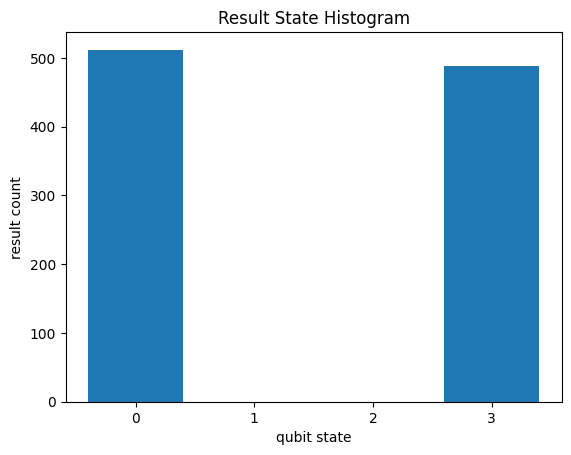

In [47]:
import matplotlib.pyplot as plt

cirq.plot_state_histogram(sample, plt.subplot())
plt.show()

Here I've created the quantum teleportation circuit and simulated it using cirq.

[creating classical comm line](https://quantumai.google/cirq/build/classical_control)

In [64]:
def quantum_teleportation_circuit(gate):
    circuit = cirq.Circuit()
    alice = cirq.NamedQubit('alice')
    msg = cirq.NamedQubit('msg')
    bob = cirq.NamedQubit('bob')

    #entangles qubit betweeen  Alice and Bob
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


    # Creates a message to send.
    circuit.append(gate(msg))


    # Bell measurement of the Message and Alice's entangled qubit.
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg,alice)])


    # Uses the two classical bits from the Bell measurement to recover the
    # original quantum Message on Bob's entangled qubit.
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg,bob)])

    return circuit

In [71]:
# gate for msg qubit Pauili X

gate = cirq.X

#create circuit
circuit = quantum_teleportation_circuit(gate)
print(circuit)

alice: ───H───@───X───────M───@───────
              │   │       │   │
bob: ─────────X───┼───────┼───X───@───
                  │       │       │
msg: ─────X───────@───H───M───────@───


In [72]:
#block sphere
import numpy as np
message = cirq.Circuit(gate.on(cirq.NamedQubit('msg'))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message,index=0)

print("bloch sphere")
print(message_bloch_vector)

bloch sphere
[ 0.  0. -1.]


In [75]:
# gate for msg qubit Pauili Z
gate = cirq.Z

#create circuit
circuit = quantum_teleportation_circuit(gate)
print(circuit)

alice: ───H───@───X───────M───@───────
              │   │       │   │
bob: ─────────X───┼───────┼───X───@───
                  │       │       │
msg: ─────Z───────@───H───M───────@───


In [76]:
message = cirq.Circuit(gate.on(cirq.NamedQubit('msg'))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message,index=0)

print("bloch sphere")
print(message_bloch_vector)

bloch sphere
[0. 0. 1.]


Tried Noisy circuit but got errors